In [2]:
%cd ..
import numpy as np
import pandas as pd

C:\Users\Dongmin Kim\Documents\OnlineTSAD


In [80]:
import numpy as np
import matplotlib as mat
from matplotlib import font_manager, rc

def setPlotStyle():    
    #mat.rcParams['font.family'] = "serif"
    #mat.rcParams['font.serif'] = ["Arial"]
    mat.rcParams['font.family'] = "sans-serif"
    mat.rcParams['font.sans-serif'] = "Times new roman"
    mat.rcParams["axes.titlesize"] = "x-large"
    mat.rcParams['font.size'] = 15
    mat.rcParams['legend.fontsize'] = 15
    mat.rcParams['lines.linewidth'] = 2
    mat.rcParams['lines.color'] = 'r'
    mat.rcParams['axes.grid'] = 1     
    mat.rcParams['axes.xmargin'] = 0.1     
    mat.rcParams['axes.ymargin'] = 0.1     
    mat.rcParams["mathtext.fontset"] = "dejavuserif" #"cm", "stix", etc.
    mat.rcParams['figure.dpi'] = 500
    mat.rcParams['savefig.dpi'] = 500
setPlotStyle()

In [3]:
import matplotlib.pyplot as plt

In [4]:
normal = pd.read_csv("data/nts_uni_normal.csv")
abnormal = pd.read_csv("data/nts_uni_abnormal.csv")

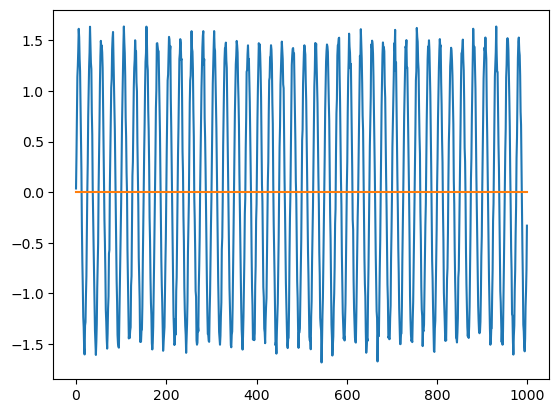

In [5]:
plt.plot(normal)

In [7]:
from utils.tools import plot_interval

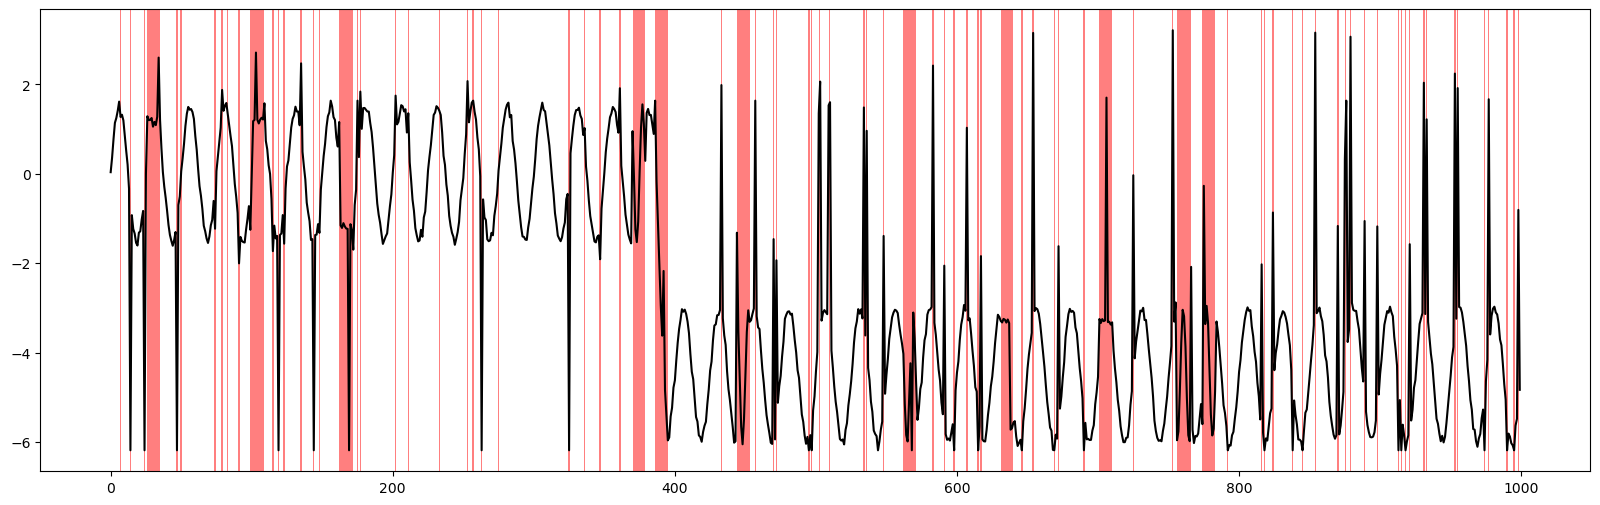

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(abnormal["value"], color="black")
plot_interval(plt, abnormal["anomaly"])
plt.show()

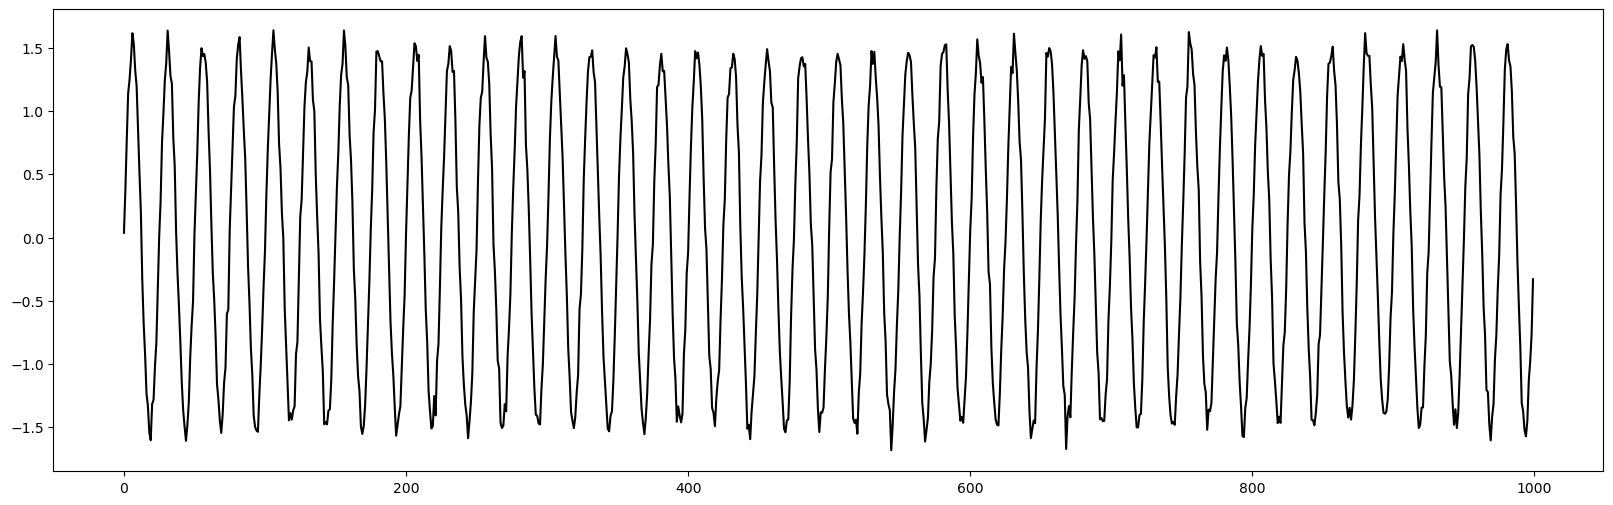

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(normal["value"], color="black")
#plot_interval(plt, abnormal["anomaly"])
plt.show()

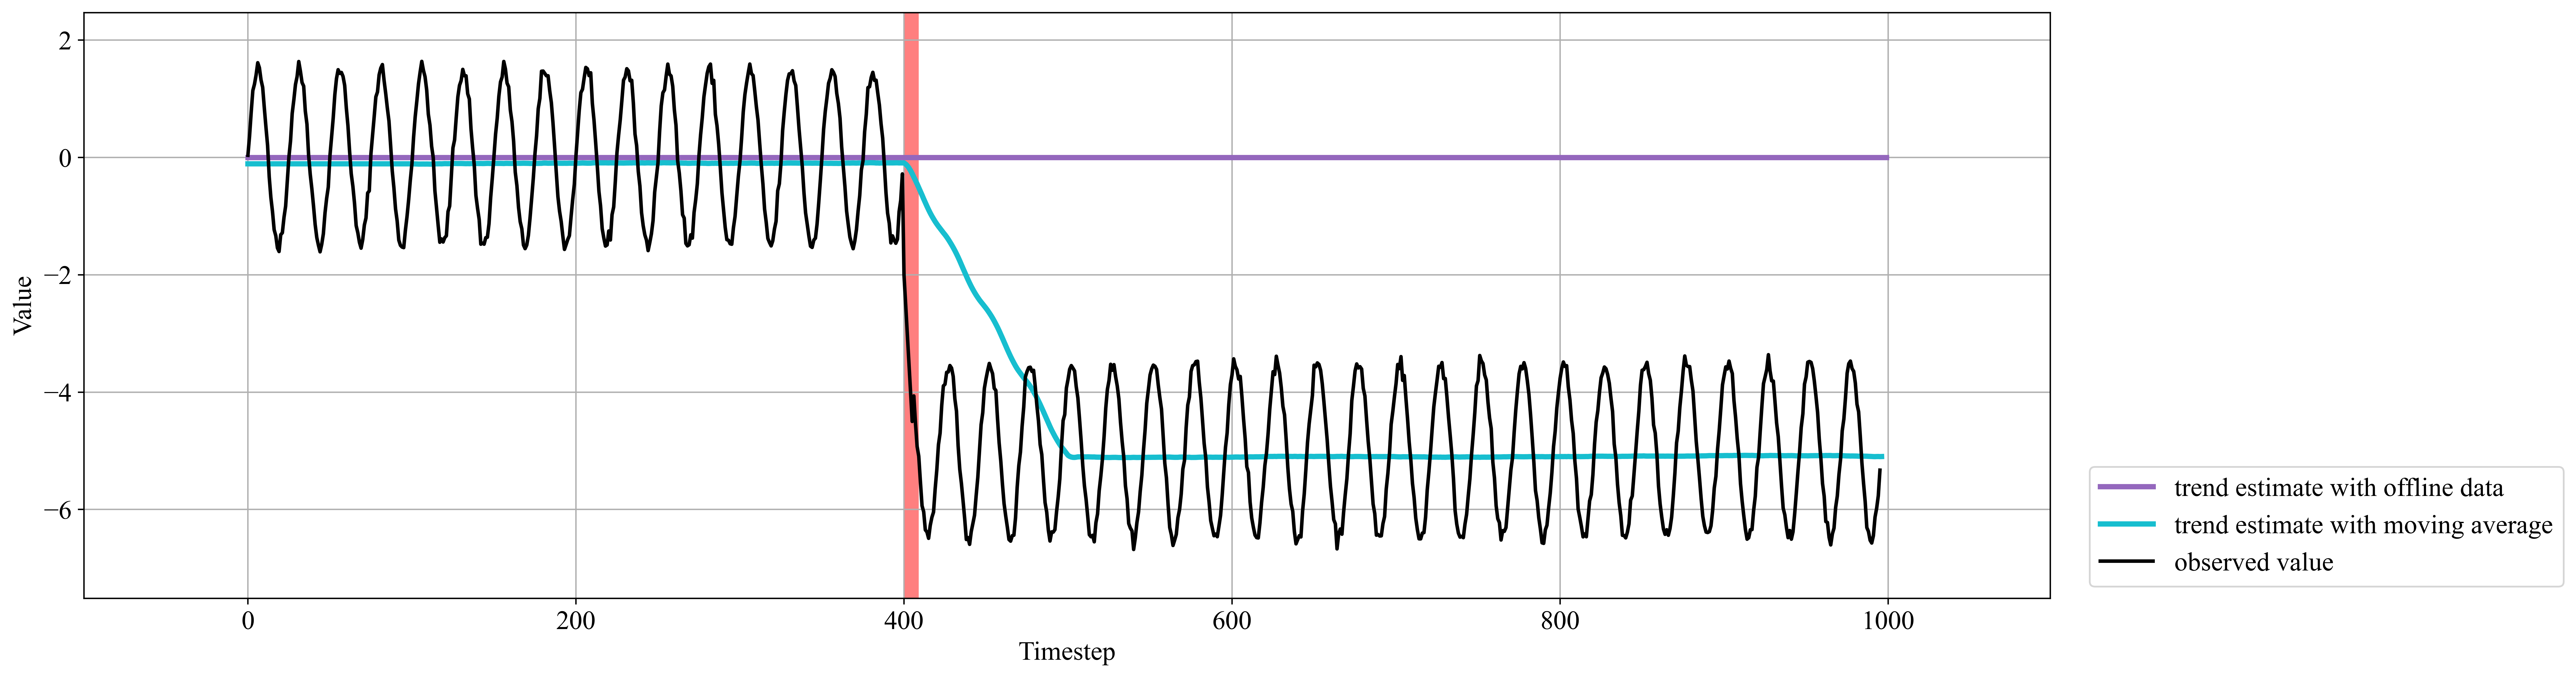

In [94]:
w = 100
ma = np.convolve(nnm, np.ones(w), "valid")/w
ma = np.concatenate([[ma[0]]*w, ma])-0.1
nnm = np.concatenate([normal["value"][:400], np.array([x for x in np.arange(-2, -5, -0.5)]), -5+normal["value"][410:]])
nnm_label = np.array([0]*400+[1]*10+[0]*590)
offline_trend = [normal["value"][:400].mean()]*1000

plt.figure(figsize=(20, 6))
plt.plot(offline_trend, color="C4", linewidth=3, label="trend estimate with offline data")
plt.plot(ma, color="C9", linewidth=3, label="trend estimate with moving average")
plt.plot(nnm, color="black", label="observed value")

plt.xlabel("Timestep")
plt.ylabel("Value")
plot_interval(plt, nnm_label)
plt.legend(loc=(1.02, 0.02))
plt.show()

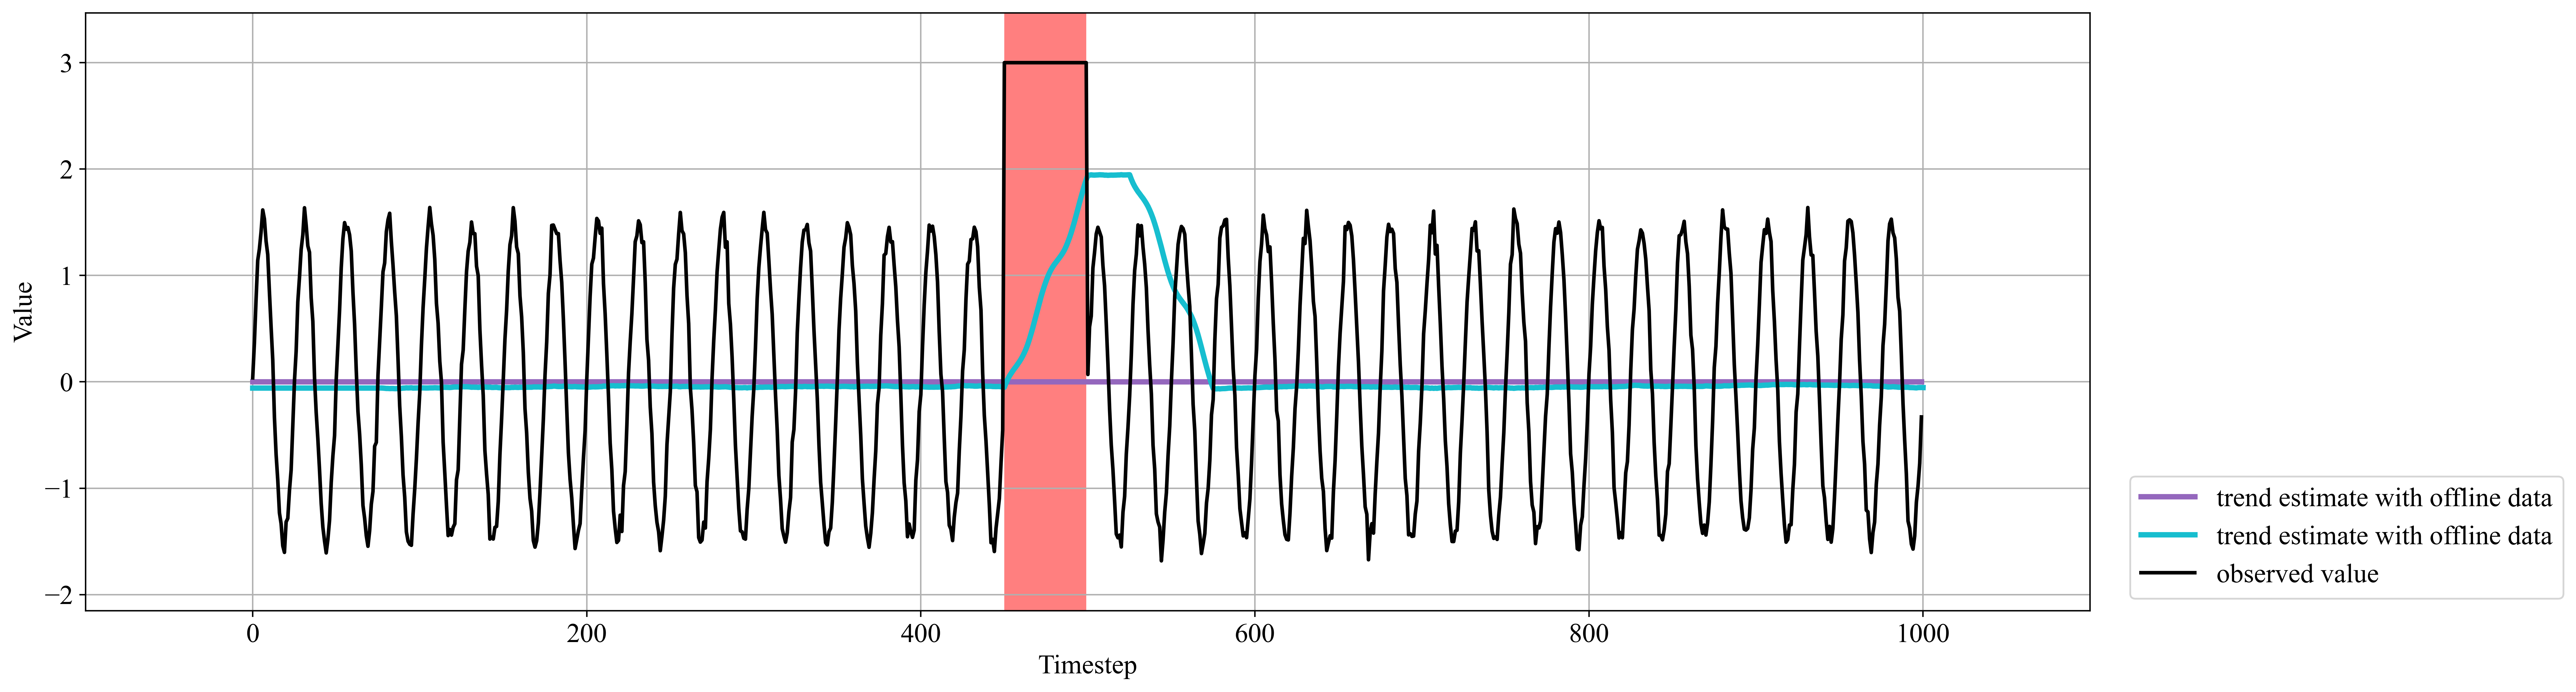

In [95]:
nnm = np.concatenate([normal["value"][:450], np.array([3.0]*50), normal["value"][500:]])
nnm_label = np.array([0]*450+[1]*50+[0]*500)
w = 75
ma = np.convolve(nnm, np.ones(w), "valid")/w
ma = np.concatenate([[ma[0]]*w, ma])-0.05
offline_trend = [normal["value"][:450].mean()]*1000

plt.figure(figsize=(20, 6))

plt.plot(offline_trend, color="C4", linewidth=3, label="trend estimate with offline data")
plt.plot(ma, color="C9", linewidth=3, label="trend estimate with offline data")
plt.plot(nnm, color="black", label="observed value")

plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend(loc=(1.02, 0.02))
plot_interval(plt, nnm_label)
plt.show()